# ML for Econ Analysis Project 1 - Peru
name here
## 1 Problem Description
blablablabla


In [1]:
# Import everything
import pandas as pd
import numpy as np
# for plot
import seaborn as sns
#stata-like output
import statsmodels.api as sm
import statsmodels.formula.api as smf
#for ml
from sklearn.linear_model import LinearRegression

from numpy.linalg import inv
from numpy.random import normal as rnorm
#for missing values
import missingno as msno

In [2]:
# Import matplotlib for graphs
import matplotlib.pyplot as plt

# Set global parameters
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

# 2 Data Preprocessing
to check the missing value of data, visulize the data to get a "feel", and normalize the data

## 2.1 Dataset acquisition
we use pd.read_csv to read the csv file as dataframe data type.

In [15]:
# Peru data
peru = pd.read_csv('datasets/peru_for_ml_course.csv')
peru.head()
# Overview of all variables
peru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46305 entries, 0 to 46304
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lnpercapitaconsumption   23153 non-null  float64
 1   d_fuel_other             46305 non-null  int64  
 2   d_fuel_wood              46305 non-null  int64  
 3   d_fuel_coal              46305 non-null  int64  
 4   d_fuel_kerosene          46305 non-null  int64  
 5   d_fuel_gas               46305 non-null  int64  
 6   d_fuel_electric          46305 non-null  int64  
 7   d_fuel_none              46305 non-null  int64  
 8   d_water_other            46305 non-null  int64  
 9   d_water_river            46305 non-null  int64  
 10  d_water_well             46305 non-null  int64  
 11  d_water_truck            46305 non-null  int64  
 12  d_water_pylon            46305 non-null  int64  
 13  d_water_outside          46305 non-null  int64  
 14  d_water_inside        

## 2.2 Cleaning the Data
We check our dataset by detecting whether it contains null, Nan values or missing values.

In [4]:
peru.isnull().sum()

lnpercapitaconsumption    23152
d_fuel_other                  0
d_fuel_wood                   0
d_fuel_coal                   0
d_fuel_kerosene               0
                          ...  
h_hhsize                      0
id_for_matlab                 0
hhid                          0
lncaphat_OLS                927
percapitahat_OLS            927
Length: 81, dtype: int64

In [75]:
columnNames = peru.columns.values.tolist()
columnNames[2]

'd_fuel_wood'

In [88]:
peru.loc[25:26,columnNames[22:30]]

,d_wall_woodmat,d_wall_stonemud,d_wall_quincha,d_wall_tapia,d_wall_adobe,d_wall_stonecement,d_wall_brickcement,d_roof_other
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


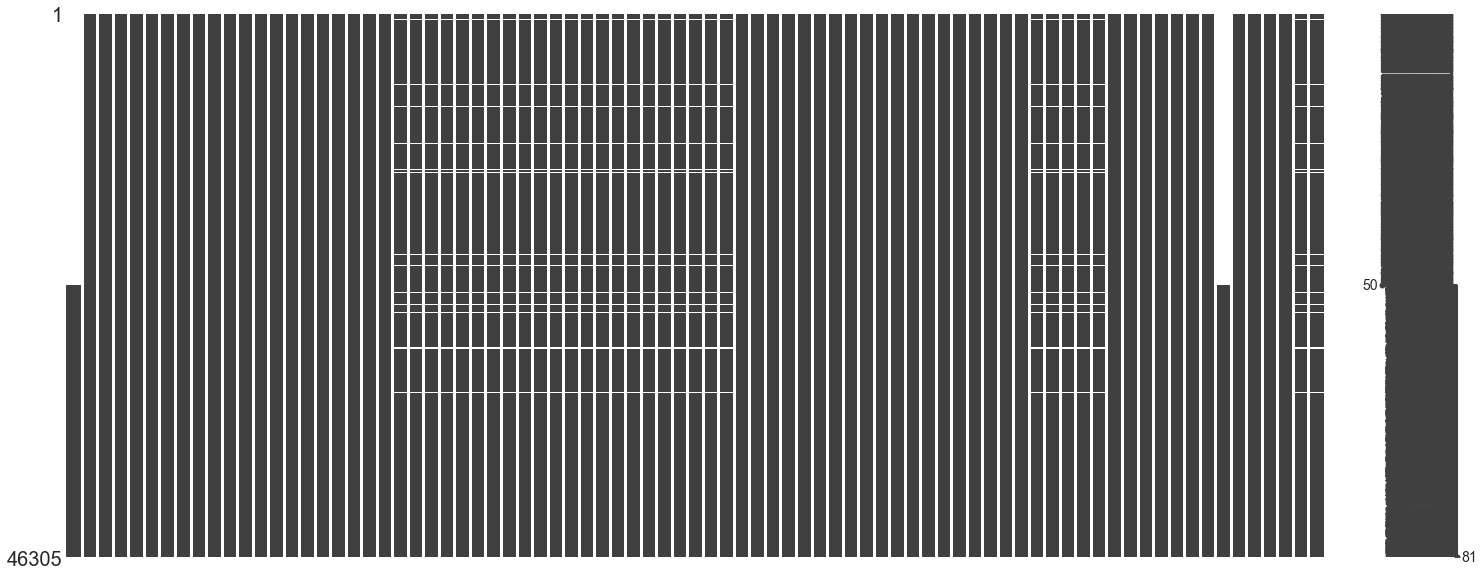

In [21]:
# Visualize no missing values
msno.matrix(peru)

In [6]:
# Visualize the distribution of each feature to get an overview of the dataset.
peru.describe(include='all')

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,...,d_lux_4,d_lux_5,training,percapitaconsumption,poor,h_hhsize,id_for_matlab,hhid,lncaphat_OLS,percapitahat_OLS
count,23153.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,...,46305.000000,46305.000000,46305.000000,23153.000000,46305.000000,46305.000000,46305.000000,4.630500e+04,45378.000000,45378.000000
mean,5.853638,0.104244,0.307202,0.025656,0.004557,0.518734,0.007796,0.031811,0.041421,0.207947,...,0.043797,0.036389,0.500011,459.015591,0.280207,4.012094,23153.000000,1.869936e+08,5.850041,459.121087
std,0.742314,0.305580,0.461339,0.158108,0.067350,0.499654,0.087952,0.175498,0.199264,0.405843,...,0.204644,0.187258,0.500005,401.571900,0.449105,2.093215,13367.246444,1.111905e+08,0.605646,293.660061
min,2.110213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,8.250000,0.000000,1.000000,1.000000,1.010110e+05,4.434424,-57.498260
25%,5.344018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,209.352100,0.000000,2.000000,11577.000000,9.080021e+07,5.332906,235.941375
50%,5.877269,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,356.833300,0.000000,4.000000,23153.000000,1.828055e+08,5.871004,404.708750
75%,6.354380,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,575.005700,1.000000,5.000000,34729.000000,2.814050e+08,6.306364,611.242975
max,8.858051,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,7030.769000,1.000000,20.000000,46305.000000,4.035098e+08,7.738163,2132.654000


## 2.3 Split Train-test dataset

In [152]:
trainNaN = peru[peru['training']==1]
train = trainNaN.dropna()
# train.isnull().sum().sum()

0

In [146]:
test = peru[peru['training']==0]
test.head()

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,...,d_lux_4,d_lux_5,training,percapitaconsumption,poor,h_hhsize,id_for_matlab,hhid,lncaphat_OLS,percapitahat_OLS
0,NaN,0,1,0,0,0,0,0,0,1,...,0,0,0,NaN,0,1,1,233710511,5.246471,284.4243
1,NaN,0,0,0,0,1,0,0,0,0,...,0,0,0,NaN,0,3,2,295508011,6.129468,522.8840
2,NaN,0,0,0,0,1,0,0,0,0,...,0,0,0,NaN,0,4,3,257600211,6.665577,878.4961
3,NaN,0,0,0,0,1,0,0,0,0,...,0,0,0,NaN,1,9,4,198104311,6.088295,567.4705
4,NaN,0,1,0,0,0,0,0,0,1,...,0,0,0,NaN,1,8,5,24805311,5.008170,115.4929


In [23]:
x_train = train.iloc[:,1: 73]
x_test = test.iloc[:,1: 73]
x_train.head()

,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,d_water_well,...,d_crowd_1to2,d_crowd_2to4,d_crowd_4to6,d_crowd_6plus,d_lux_0,d_lux_1,d_lux_2,d_lux_3,d_lux_4,d_lux_5
23152,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
23153,0,0,0,0,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0,0,0,0,1,0
23154,0,1,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1,0,0,0,0,0
23155,0,1,0,0,0,0,0,0,1,0,...,1.0,0.0,0.0,0.0,1,0,0,0,0,0
23156,1,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1,0,0,0,0,0


In [37]:
# add constant for train_x
one = np.ones(np.shape(x_train))
x_train_withcons = np.concatenate([one,x_train],axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [148]:
y1_train = train.loc[:,'percapitaconsumption']
y2_train = train.loc[:,'lnpercapitaconsumption']
y1_test = test.loc[:,'percapitaconsumption']
y2_test = test.loc[:,'lnpercapitaconsumption']

# 3 Model implementation
## 3.1 Replicate the original paper(Peru): OLS

In [25]:
# linear regression without constant
linreg = LinearRegression()
model1 = linreg.fit(x_train_withcons,y1_train)
x_train.shape

(22674, 72)

In [27]:
model1.coef_

array([ 4.38595756e+10, -1.65864374e+15,  4.29351898e+14,  1.40799745e+15,
       -1.20597826e+15, -2.96909370e+15, -6.13381513e+14, -1.68178344e+15,
       -1.02080958e+14,  4.63125191e+14, -1.72778222e+15, -5.43883026e+13,
        2.34421314e+15,  4.64376816e+14, -5.97425461e+14,  1.15843465e+15,
       -9.54696452e+14,  8.63441135e+13, -1.94749456e+14, -5.46663458e+14,
       -1.60332649e+14, -6.35022168e+14, -3.51074940e+14, -3.69979378e+14,
        1.57724607e+14,  2.93999076e+14,  1.05813810e+15, -2.71142607e+14,
        9.81259160e+14,  3.30728226e+14, -6.25275589e+14,  2.92861331e+14,
       -8.14104839e+14, -2.31822008e+14,  1.18080976e+14,  1.13354324e+14,
       -4.68084001e+14,  1.08331753e+14,  2.36603825e+14, -3.16242541e+14,
       -1.45928081e+14, -3.76824822e+14, -2.11749974e+14, -1.24567670e+14,
        6.28054711e+13,  1.51743183e+14, -2.91591423e+14,  7.84816486e+13,
       -1.38266629e+12,  1.42455566e+12,  5.06280994e+13,  2.03952687e+13,
       -1.99149152e+13, -

In [30]:
ols_estimatey = model1.predict(x_train_withcons)
ols_estimatey

array([443.75, 814.25, 206.5 , ..., 395.  , 332.25, 763.25])

In [31]:
# linear regression with constant
linreg = LinearRegression()
model1 = linreg.fit(x_train,y1_train)
x_train.shape

(22674, 72)

In [32]:
# Table 3.3 (1)
model1.coef_

array([ 7.54220663e+14,  7.54220663e+14,  7.54220663e+14,  7.54220663e+14,
        7.54220663e+14,  7.54220663e+14,  7.54220663e+14,  3.55498367e+15,
        3.55498367e+15,  3.55498367e+15,  3.55498367e+15,  3.55498367e+15,
        3.55498367e+15,  3.55498367e+15, -1.75156250e+01, -1.66718750e+01,
       -2.56250000e+00, -4.75000000e+00, -1.05000000e+01,  4.62500000e+00,
       -2.28572675e+14, -2.28572675e+14, -2.28572675e+14, -2.28572675e+14,
       -2.28572675e+14, -2.28572675e+14, -2.28572675e+14, -2.28572675e+14,
        6.54118421e+14,  6.54118421e+14,  6.54118421e+14,  6.54118421e+14,
        6.54118421e+14,  6.54118421e+14,  6.54118421e+14,  7.60934549e+14,
        7.60934549e+14,  7.60934549e+14,  7.60934549e+14,  7.60934549e+14,
        7.60934549e+14,  7.60934549e+14, -2.50000000e-01,  3.46250000e+01,
       -1.77151990e+13, -1.77151990e+13, -1.77151990e+13, -1.77151990e+13,
       -1.77151990e+13, -1.77151990e+13, -1.77151990e+13, -1.58125000e+02,
       -6.66250000e+01, -

In [39]:
# Table 3.3 (1)
est = sm.OLS.from_formula('percapitaconsumption ~ d_fuel_other', train).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,487.4466,2.776,175.586,0.000,482.005,492.888
d_fuel_other,-271.4790,8.498,-31.948,0.000,-288.135,-254.823
